# **Análisis de Datos de Energía Global (2000 - 2024)**

**Autor:** Juan Manuel Martínez Estrada  
**Fecha de creación:** 2025-04-19  
**Versión:** 1.0

---
*Este notebook analiza las tendencias globales en el consumo de energía, la adopción de energías renovables, las emisiones de carbono y otros factores relacionados, utilizando datos a nivel de país desde el año 2000 hasta 2024.*

---

## 1. Configuación Incial

#### 1.1. Importación de Librerías

In [1]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Añadir la carpeta raíz del proyecto a sys.path
sys.path.append(os.path.abspath('..'))
import src.visualizaciones as viz
import src.procesamiento_datos as pro

#### 1.2. Configuraciones Globales

In [2]:
# --- Configuración Visual (Recomendado) ---
pd.set_option('display.max_columns', None) # Para mostrar todas las columnas
pd.set_option('display.float_format', '{:.2f}'.format) # Formato de decimales
sns.set_style('whitegrid')
sns.set_palette("deep")
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño de gráficos por defecto

#### 1.3. Definición de Rutas

In [3]:
import os

# Definiendo el path o ruta hacia el dataset original
data_path = os.path.join('..', 'data', 'dataset_original', 'global_energy_consumption.csv')

# Definiendo el path o ruta hacia el dataset procesado
# data_processed_path = os.path.join('..', 'data', 'dataset_limpio', 'global_energy_consumption_clean.csv')



#### 1.4. Carga de Datos Crudos

In [4]:
# Convirtiendo el dataset en un dataframe de pandas
df = pd.read_csv(data_path)

# Creando una copia del dataframe original
df_copy = df.copy()

## 2. Exploración Inicial de Datos (EDA)

#### 2.1. Visión General del Dataset

In [5]:
# Dimensiones del dataset
print("Dimensiones del dataset: ", df.shape)

Dimensiones del dataset:  (10000, 10)


In [6]:
# Ver las primeras filas
df.head(10)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48
5,UK,2016,4682.02,2491.92,40.47,69.06,20.07,23.39,2242.11,0.35
6,India,2024,9893.64,3912.56,27.07,31.70,57.59,18.56,3626.50,0.13
7,Canada,2008,7719.04,35819.59,15.03,62.73,57.93,21.51,3808.66,0.05
8,Russia,2020,9624.55,1708.80,77.36,63.39,48.42,24.01,525.95,0.20
9,Brazil,2008,7818.38,29198.37,79.59,25.95,36.93,27.93,2504.76,0.11


In [7]:
df.tail(10)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
9990,Russia,2007,1810.04,24458.92,60.44,33.84,21.25,17.39,1912.59,0.28
9991,Germany,2023,753.46,23248.14,20.13,52.28,55.68,31.25,2537.40,0.19
9992,Canada,2000,8011.53,34726.50,74.39,59.86,37.91,26.98,2957.43,0.35
9993,Germany,2002,1658.77,631.72,68.79,40.13,27.11,22.11,3725.05,0.28
9994,Brazil,2004,1946.42,29544.63,52.69,23.54,29.57,11.56,167.00,0.23
9995,Canada,2017,9786.50,30481.07,14.87,70.25,53.93,19.94,620.85,0.29
9996,UK,2011,7200.88,37402.75,89.00,16.55,24.35,20.57,830.73,0.48
9997,India,2011,2579.82,44516.91,46.65,68.06,57.01,33.73,993.78,0.08
9998,UK,2020,5950.39,22289.39,43.43,68.57,34.94,25.40,199.85,0.47
9999,Brazil,2018,5387.71,17454.75,89.62,49.97,30.04,37.96,4606.33,0.11


In [8]:
# Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
# Resumen estadístico
df.describe()

,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2012.15,5142.56,25039.95,47.32,44.93,40.06,25.04,2536.15,0.27
std,7.16,2848.75,14205.66,24.60,20.20,11.54,8.60,1424.11,0.13
min,2000.00,100.48,500.27,5.00,10.01,20.00,10.00,50.64,0.05
25%,2006.00,2713.88,12683.22,26.11,27.34,30.22,17.61,1293.33,0.16
50%,2012.00,5190.85,25098.77,47.15,45.11,39.98,25.09,2568.01,0.27
75%,2018.00,7579.98,37113.28,68.68,62.43,50.15,32.57,3766.18,0.39
max,2024.00,9999.26,49989.57,90.00,80.00,60.00,40.00,4999.34,0.50


In [10]:
# Verificar valores nulos
df.isna().sum()

Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64

#### 2.2. Análisis de la Estructura Temporal y Geogrpafica

In [11]:
# Distribución de países en el dataset
print(f"Número total de países: {df['Country'].nunique()}\n")
# Paises en el dataset
print(f"Paises en el dataset: {df['Country'].unique()}")

Número total de países: 10

Paises en el dataset: ['Canada' 'Germany' 'Russia' 'Brazil' 'UK' 'India' 'Australia' 'China'
 'USA' 'Japan']


In [12]:
# Distribución por años
años_disponibles = df['Year'].unique()
print(f"\nAños disponibles: {sorted(años_disponibles)}")
print(f"\nPeríodo de tiempo: {min(años_disponibles)} - {max(años_disponibles)}")


Años disponibles: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

Período de tiempo: 2000 - 2024


## 3. Estadística Descriptiva y Distribución de los Datos

### **Hipótesis**: Los países con medianas más altas en consumo total y per cápita de energía están directamente relacionados con niveles más altos de industrialización, urbanización e infraestructura energética robusta.

### Preguntas de la sección:

- *¿Qué país tiene la mediana más alta/baja de cada variable?*

- *¿Cuál es la distribución general de cada variable?*

#### 3.1. Histograma y KDE plot de `Total Energy Consumption (TWh)`

In [13]:
df = df.sort_values(by = "Year", ascending = True)
df.head(5)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
8542,Brazil,2000,9263.53,24225.70,45.82,31.36,53.21,20.34,3007.21,0.25
2951,China,2000,5994.95,1708.20,58.72,44.42,55.30,10.02,1352.51,0.44
5307,India,2000,1336.34,48404.72,86.65,79.65,56.81,26.97,2739.25,0.39
9067,Germany,2000,5318.83,24442.64,79.59,51.21,58.70,25.56,1117.72,0.34
2896,UK,2000,328.22,9432.61,10.75,48.48,30.41,10.23,2347.01,0.39


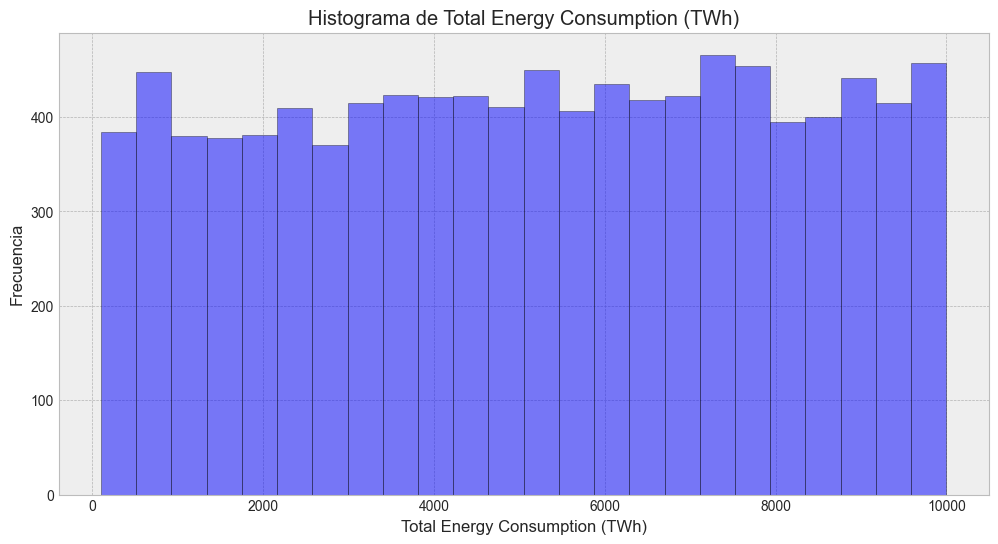

In [14]:
# Histograma de Total Energy Consumption (TWh)
viz.crear_histograma(df, 'Total Energy Consumption (TWh)', 'Total Energy Consumption (TWh)', 'Frecuencia')

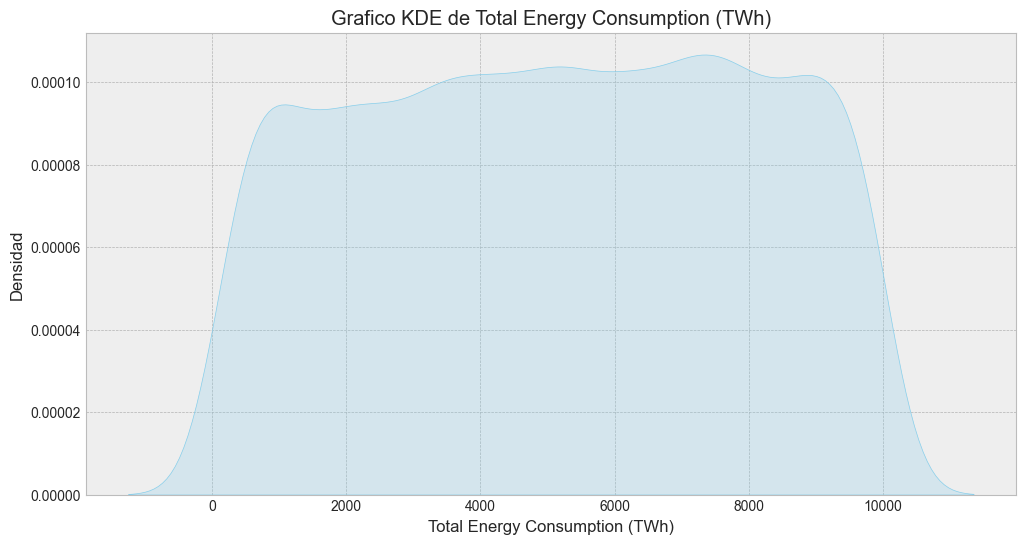

In [15]:
# Gráfico de estimación de densidad de kernel de Total Energy Consumption (TWh)
viz.crear_grafico_kde(df, 'Total Energy Consumption (TWh)', 'Total Energy Consumption (TWh)', 'Densidad')

#### 3.2.  Histograma y KDE plot de `Per Capita Energy Use (kWh)`

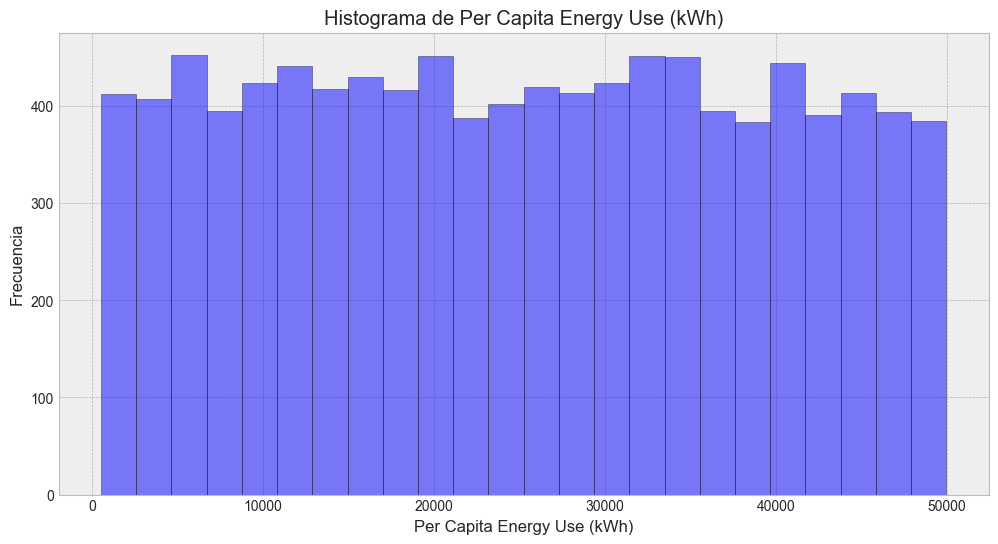

In [16]:
# Histograma de Per Capita Energy Use (kWh)
viz.crear_histograma(df, 'Per Capita Energy Use (kWh)', 'Per Capita Energy Use (kWh)', 'Frecuencia')

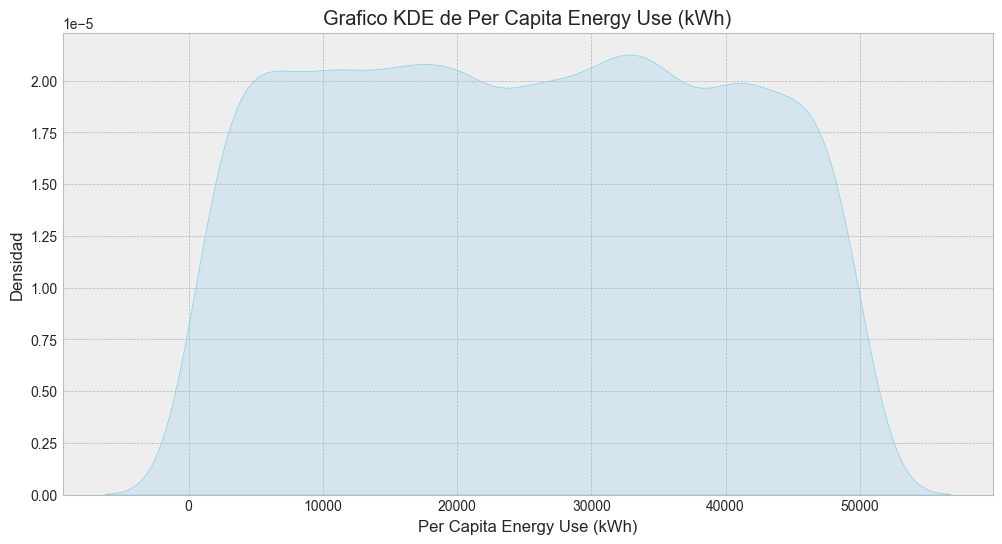

In [17]:
# Gráfico de estimación de densidad de kernel de Per Capita Energy Use (kWh)
viz.crear_grafico_kde(df, 'Per Capita Energy Use (kWh)', 'Per Capita Energy Use (kWh)', 'Densidad')

#### 3.3 Histograma y KDE plot de `Renewable Energy Share (%)`

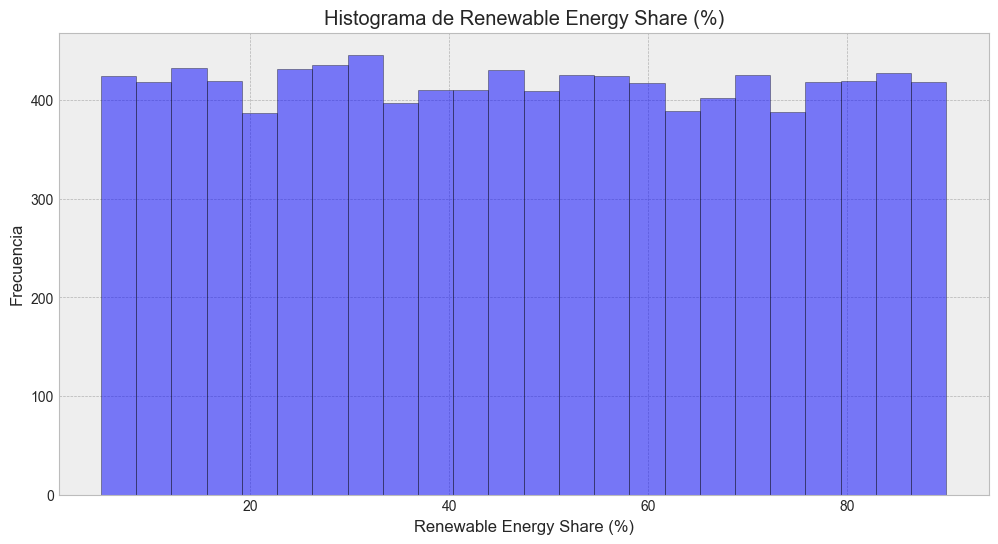

In [18]:
# Histograma de Renewable Energy Share (%)
viz.crear_histograma(df, 'Renewable Energy Share (%)', 'Renewable Energy Share (%)', 'Frecuencia')

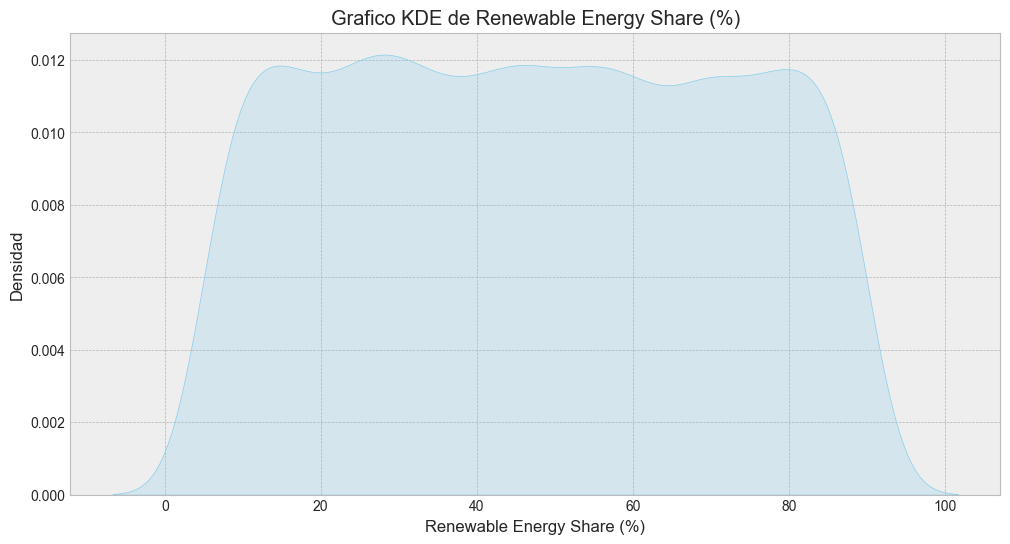

In [19]:
# Gráfico de estimación de densidad de kernel de Renewable Energy Share (%)
viz.crear_grafico_kde(df, 'Renewable Energy Share (%)', 'Renewable Energy Share (%)', 'Densidad')

#### 3.4. Histograma y KDE plot de `Fossil Fuel Dependency (%)`

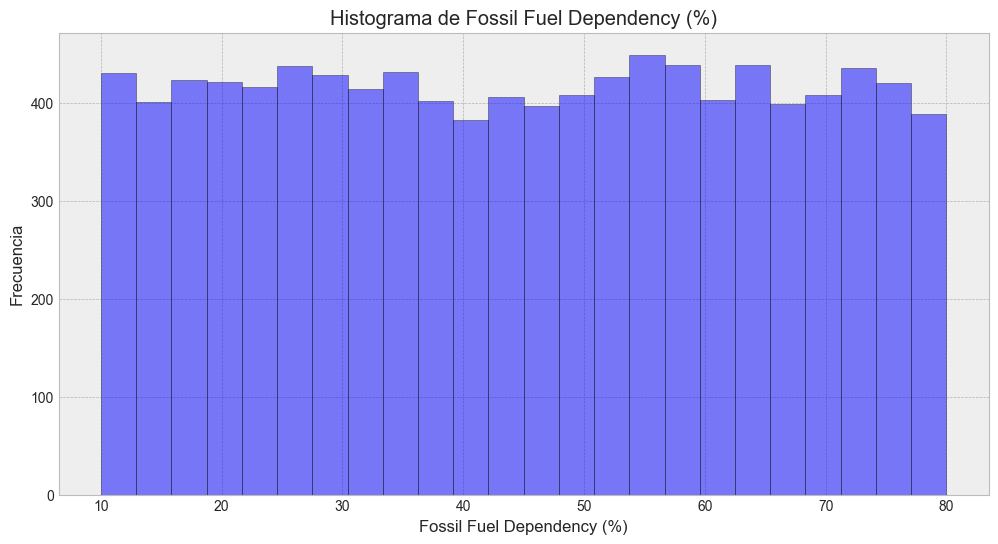

In [20]:
# Histograma de Fossil Fuel Dependency (%)
viz.crear_histograma(df, 'Fossil Fuel Dependency (%)', 'Fossil Fuel Dependency (%)', 'Frecuencia')

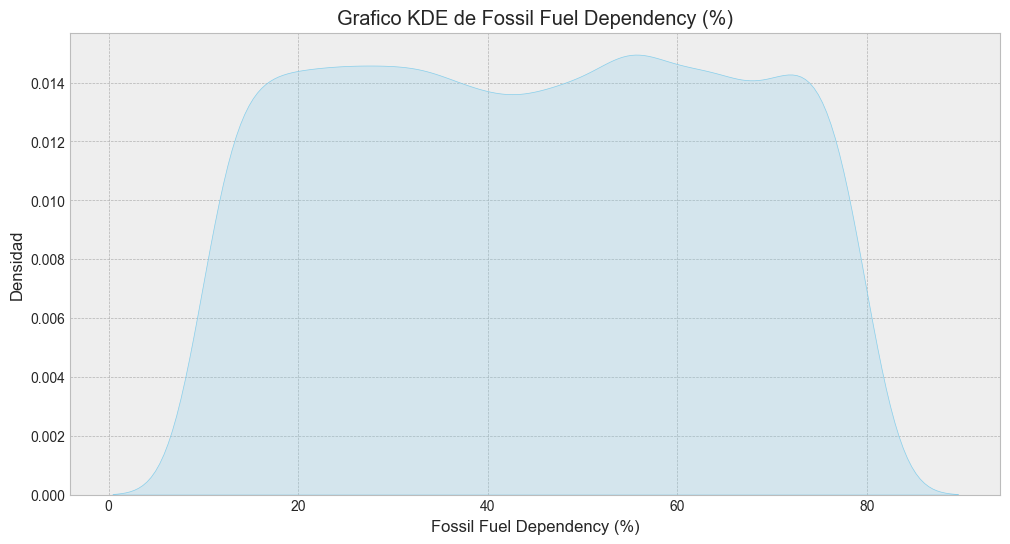

In [21]:
# Gráfico de estimación de densidad de kernel de Fossil Fuel Dependency (%)
viz.crear_grafico_kde(df, 'Fossil Fuel Dependency (%)', 'Fossil Fuel Dependency (%)', 'Densidad')

#### 3.5. Histograma y KDE plot de `Carbon Emissions (Million Tons)`

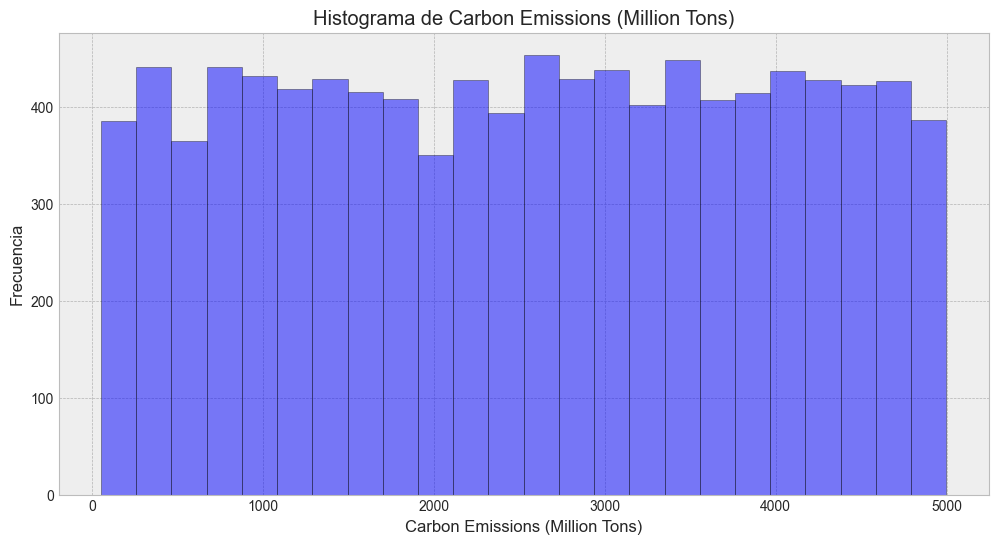

In [22]:
# Histograma de Carbon Emissions (Million Tons)
viz.crear_histograma(df, 'Carbon Emissions (Million Tons)', 'Carbon Emissions (Million Tons)', 'Frecuencia')

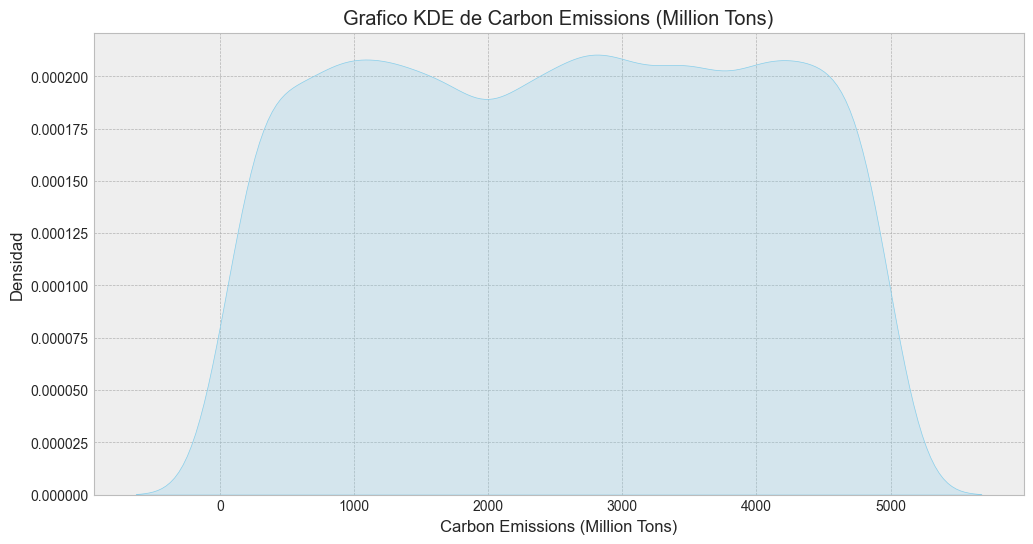

In [23]:
# Gráfico de estimación de densidad de kernel de Fossil Fuel Dependency (%)
viz.crear_grafico_kde(df, 'Carbon Emissions (Million Tons)', 'Carbon Emissions (Million Tons)', 'Densidad')

#### 3.6. Histograma y KDE plot de `Energy Price Index (USD/kWh)`

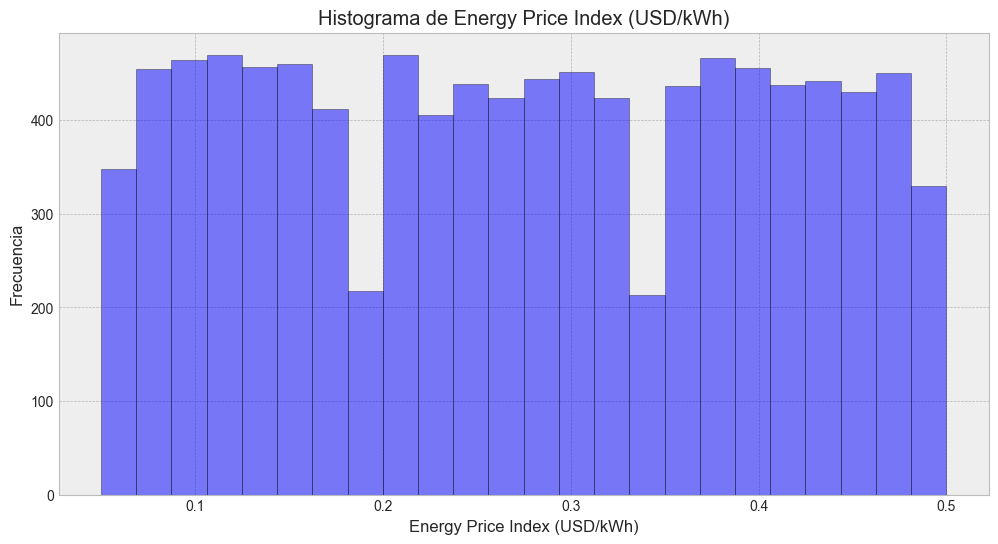

In [24]:
# Histograma de Energy Price Index (USD/kWh)
viz.crear_histograma(df, 'Energy Price Index (USD/kWh)', 'Energy Price Index (USD/kWh)', 'Frecuencia')

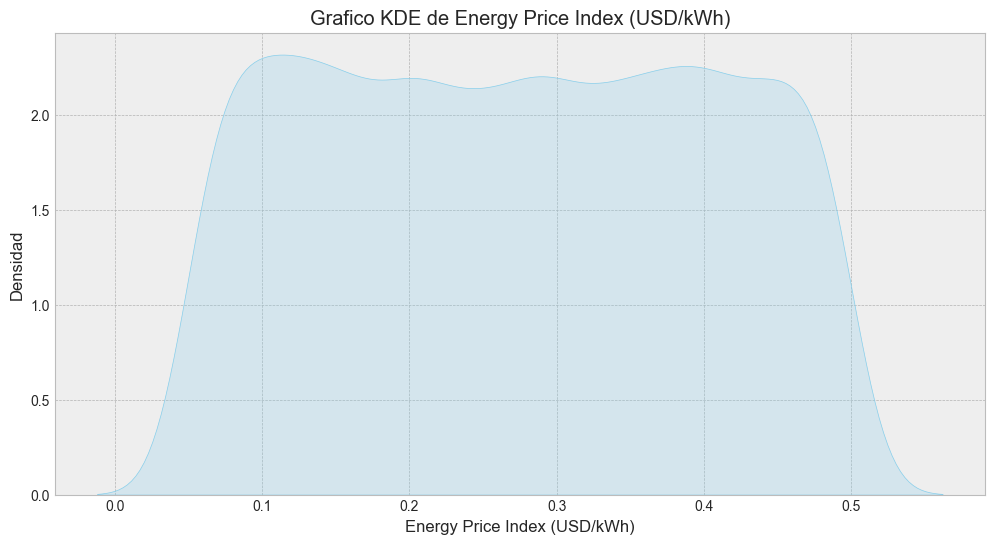

In [25]:
# Gráfico de estimación de densidad de kernel de Energy Price Index (USD/kWh)
viz.crear_grafico_kde(df, 'Energy Price Index (USD/kWh)', 'Energy Price Index (USD/kWh)', 'Densidad')

#### 3.7. Boxplots comparativos por país para todas las variables anteriores

In [26]:
cols = ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 
        'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 
        'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']

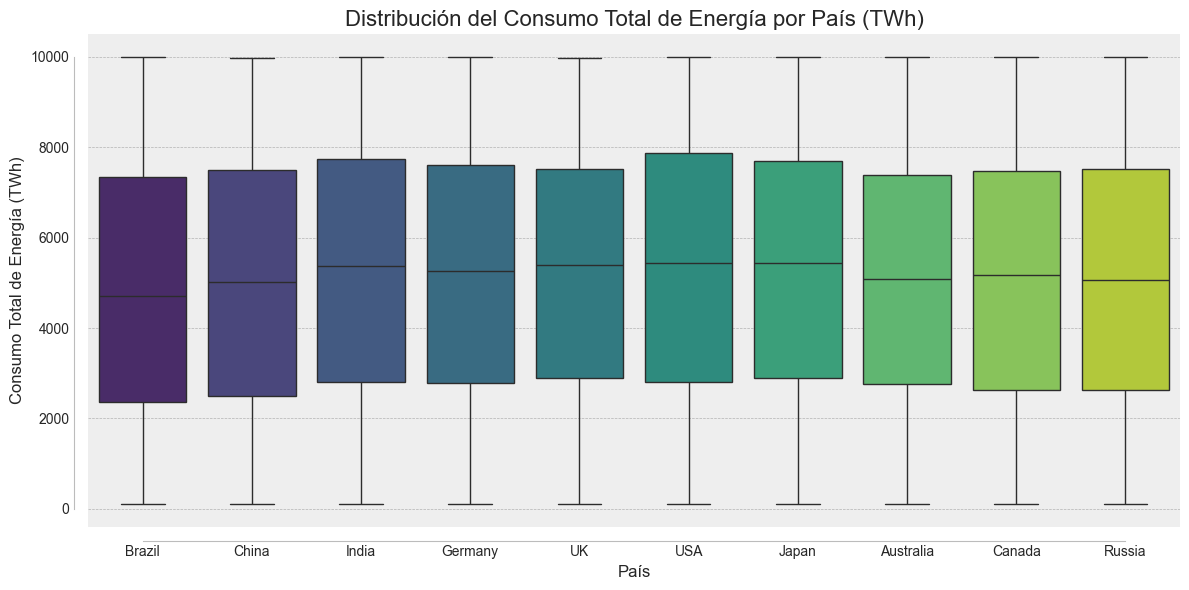

In [27]:
# Generando un Boxplot para el Total Energy Consumtion (TWh)
viz.crear_boxplot(df, 'Country', 'Total Energy Consumption (TWh)', 'Distribución del Consumo Total de Energía por País (TWh)', 'País', 'Consumo Total de Energía (TWh)')

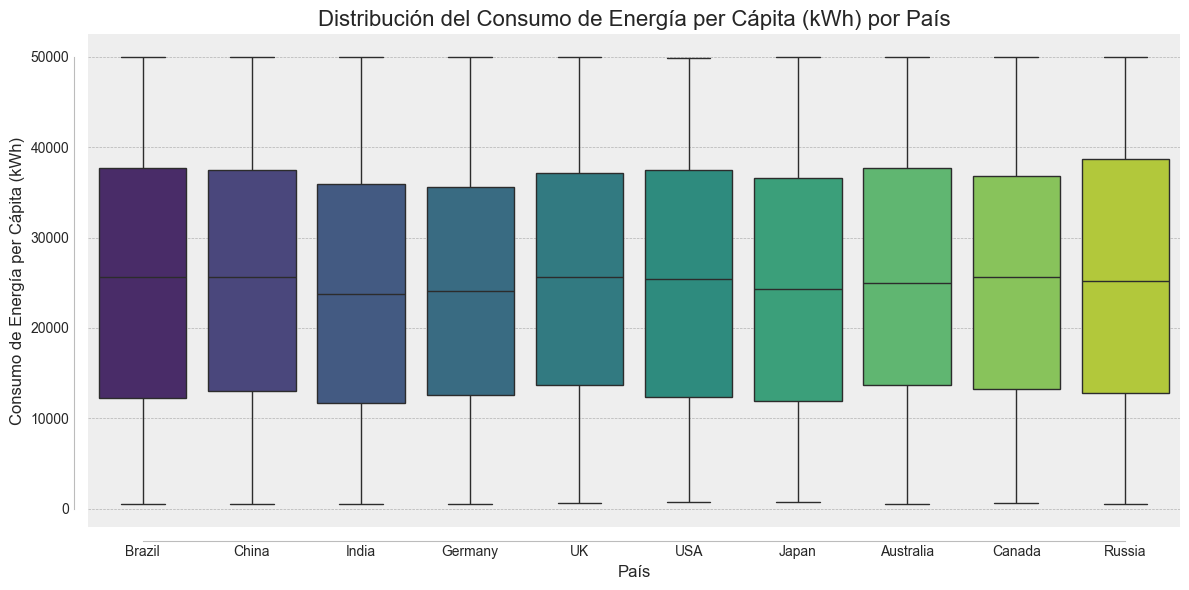

In [28]:
# Generando un Boxplot para el Per Capita Energy Use (kWh)
viz.crear_boxplot(df, 'Country', 'Per Capita Energy Use (kWh)', 'Distribución del Consumo de Energía per Cápita (kWh) por País', 'País', 'Consumo de Energía per Cápita (kWh)')

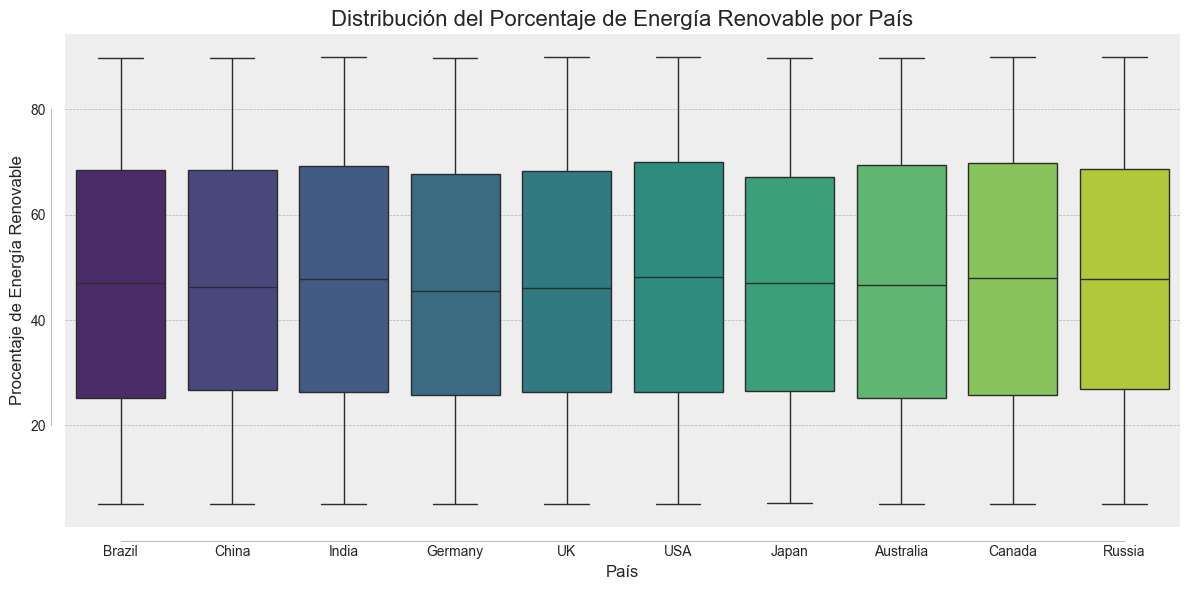

In [29]:
# Generando un Boxplot para el Renewable Energy Share (%)
viz.crear_boxplot(df, 'Country', 'Renewable Energy Share (%)', 'Distribución del Porcentaje de Energía Renovable por País', 'País', 'Procentaje de Energía Renovable')

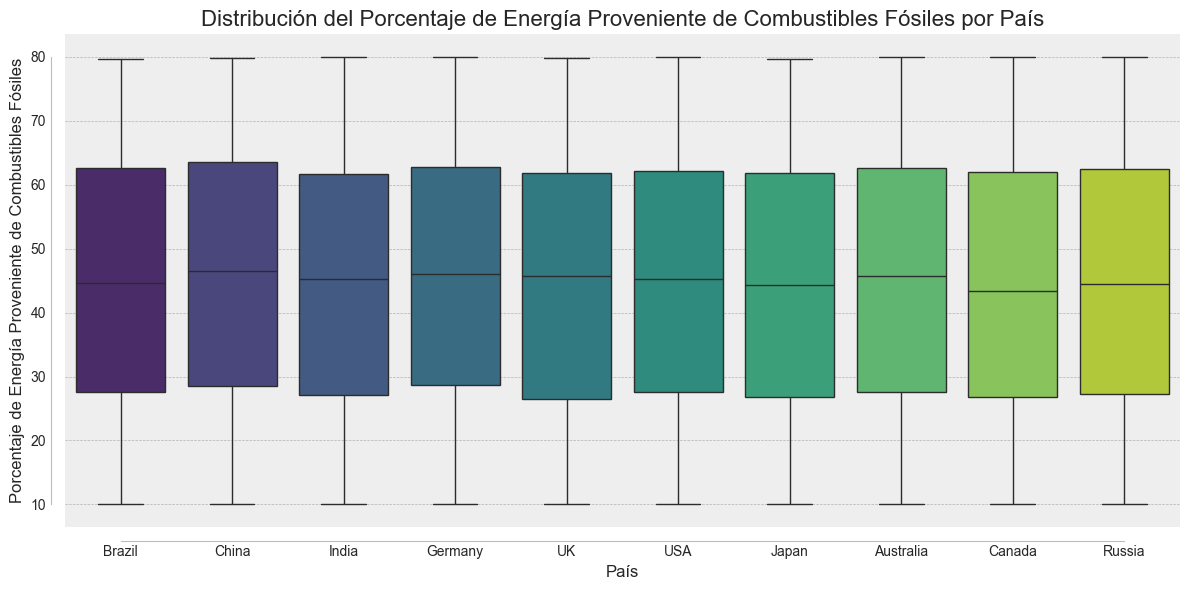

In [30]:
# Generando un Boxplot para el Fossil Fuel Dependency (%)
viz.crear_boxplot(df, 'Country', 'Fossil Fuel Dependency (%)', 'Distribución del Porcentaje de Energía Proveniente de Combustibles Fósiles por País', 'País', 'Porcentaje de Energía Proveniente de Combustibles Fósiles')

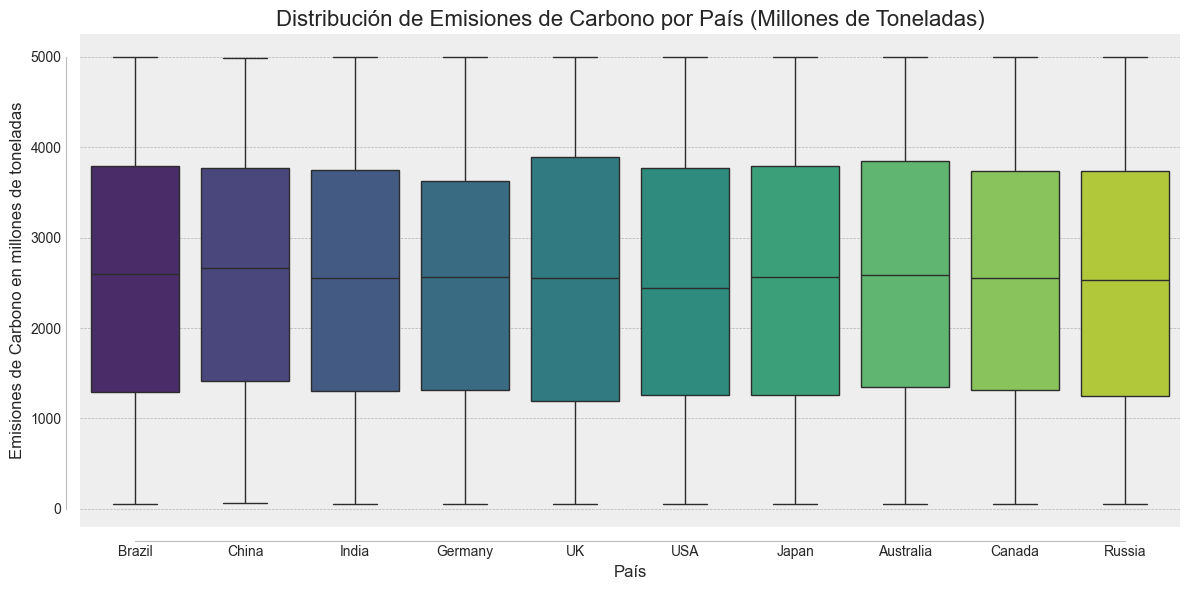

In [31]:
# Generando un Boxplot para el Carbon Emissions (Million Tons)
viz.crear_boxplot(df, 'Country', 'Carbon Emissions (Million Tons)', 'Distribución de Emisiones de Carbono por País (Millones de Toneladas)', 'País', 'Emisiones de Carbono en millones de toneladas')

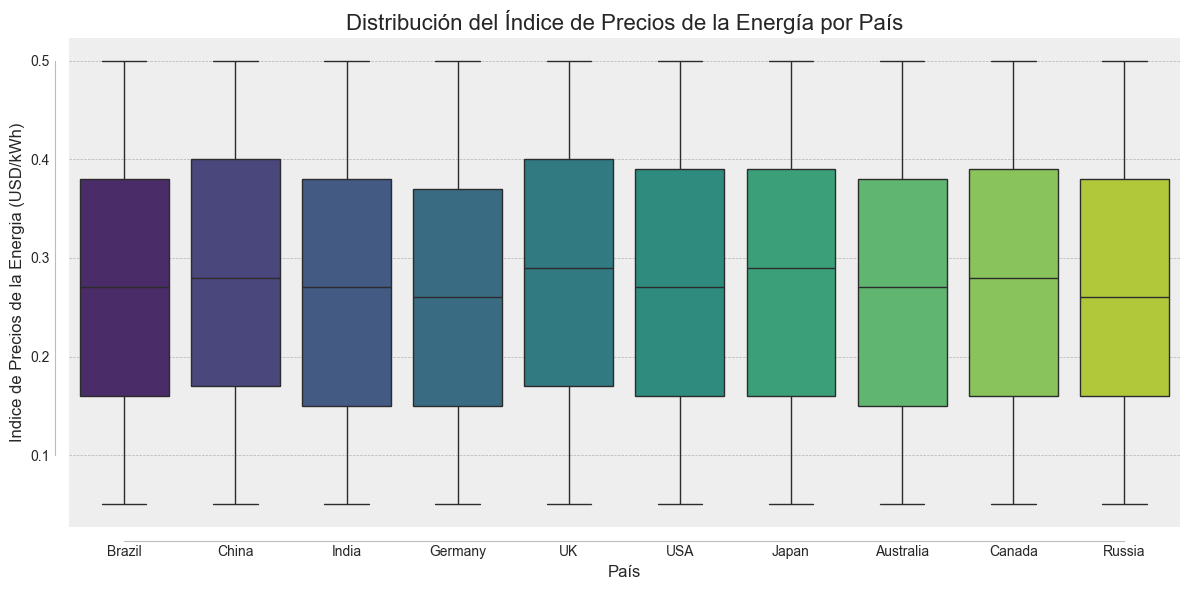

In [32]:
# Generando un Boxplot para el Energy Price Index (USD/kWh)
viz.crear_boxplot(data = df, nombre_col1 = 'Country', nombre_col2 = 'Energy Price Index (USD/kWh)', titulo = 'Distribución del Índice de Precios de la Energía por País', etiqueta_eje_x = 'País', etiqueta_eje_y = 'Indice de Precios de la Energia (USD/kWh)')

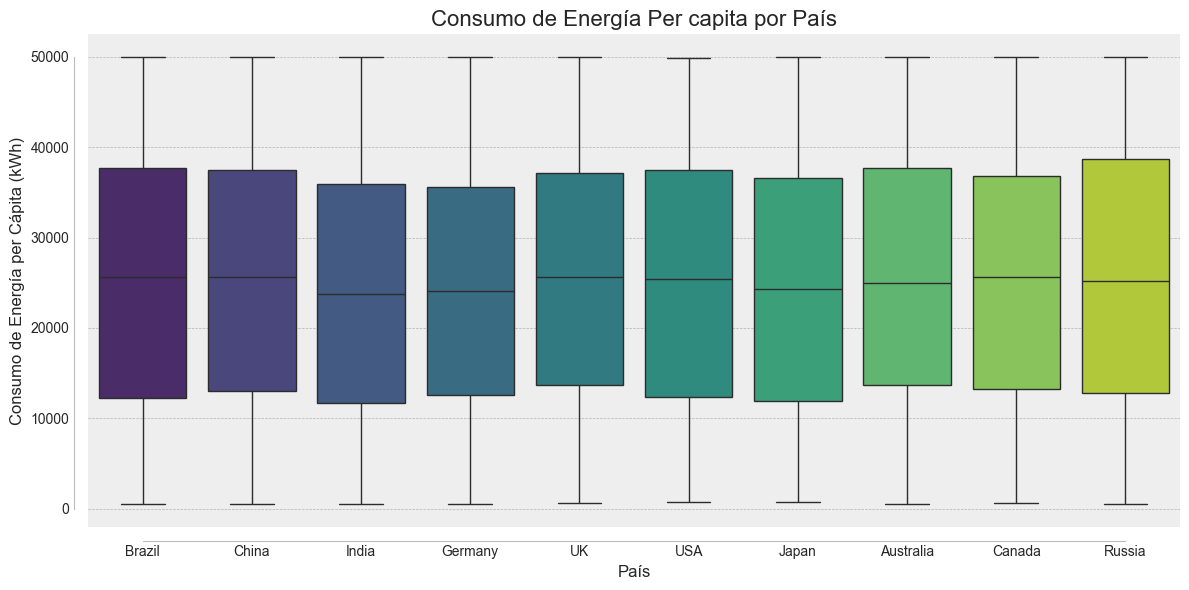

In [33]:
# Generando un Boxplot para el Per Capita Energy Use (kWh)
viz.crear_boxplot(data = df, nombre_col1 = 'Country', nombre_col2 = 'Per Capita Energy Use (kWh)', titulo = 'Consumo de Energía Per capita por País', etiqueta_eje_x = 'País', etiqueta_eje_y = 'Consumo de Energía per Cápita (kWh)')

## **Evaluación de la Hipótesis planteada para la sección**

---

#### R/ La hipótesis se sostiene parcialmente al analizar el consumo total de energía, donde economías más grandes y desarrolladas tienden a presentar medianas más altas. No obstante, el análisis del consumo per cápita revela que el nivel de industrialización, urbanización e infraestructura, por sí solos, no determinan directamente un mayor consumo individual. Otros factores específicos de cada nación juegan un papel crucial en la configuración del uso de energía por habitante, como lo pueden ser sus habitos, como lo pueden ser sus hábitos de consumo arraigados culturalmente, las políticas gubernamentales de eficiencia energética o subsidios y transporte, e incluso las condiciones climáticas que demandan un mayor o menor uso de energía para climatización.



## **Respuestas a las preguntas de la sección**

#### *¿Cuál es la distribución general de cada variable?*

---

#### R/ Es evidente que los histogramas y los gráficos KDE revelan consistentemente distribuciones multimodales, caracterizadas por la presencia de múltiples picos o valores de alta frecuencia. Esta característica, técnicamente denominada distribución multimodal, sugiere la existencia de distintos grupos de países que comparten niveles de **Consumo de Energía per Cápita (kWh)**, **Consumo Total de Energía (TWh)**, etc. que son notablemente similares para las naciones analizadas.

#### *¿Qué país tiene la mediana más alta/baja de cada variable?*

---

#### R\ Para determinar cual es el país con mediana más alta o baja usaremos la información proporcionada por los boxplot o graficos de cajas y bigotes.

#### - Para la variable "Consumo Total de Energía (TWh)", tenemos que USA tiene la mediana más alta entre los países a analizar siendo esta de **5437 TWh** lo que se puede interpretar como mejores condiciones economicas, una infraestructura mucho más amplia y robusta a comparación de las otras naciones, consumos elevados tanto de industrias, comercios y usuarios residenciales. En contraste esta Brasil con una mediana de **4717.8 TWh**, esta diferencia entre ambos paises tambien se debe al desarrollo económico, social e industrial, dado que el pais número 1 actualmente es USA es la super potencia, mientras que Brasil esta en una etapa de crecimiento, dónde aún no se puede comparar su ecónomia, infraestructura e incluso su demanda con paises del nivel de USA.
#### A partir de lo antes mencionado surgen cuestiones interesantes como: ¿Cómo se mantendría la sostenibilidad energética de grandes economías? y tambien ¿Qué caminos deberían de seguir las economías emergentes como Brasil?

#### - Para la variable "Consumo de Energía per Cápita (kWh)", se presenta a Brasil con ma mayor mediana de consumo per cápita siendo esta de **25679.7 kWh** comparado con India que presenta un consumo de **23798.6 kWh**, en si esta métrica representa la cantidad promedio de energía que consume una persona para este caso durante 1 año, lo que se puede interpretar como una disparidad en los estándares de vida, el acceso a la eléctricidad y el nivel de industrialización, esto hay que verlo desde las realidades sociale de ambos paises, en India se presenta una alta desigualdad social, pobresa y un sistema de castas, lo que dificulta el acceso a servicios básicos por lo que el consumo disminuye, Brasil tambien enfrenta retos como la desigualdad regional, la violencia y la marginalización de ciertos grupos. 
#### Aunque ambos paises presentan dificultades sociales el acceso a los servicios básicos es muy difente para Brasil que para India y esto se ve reflejado en el consumo de energía per cápita.

#### - Para la variable "Porcentaje de Energía Renovable", Sorprendentemente USA muestra una mayor mediana que Alemania, famosa por su transición energética, estos resultados se podrían deber cómo se clasifican y reportan las energías renovables, USA al tener una mayor diversidad geográfica e incluso mayor tamaño lo que facilita la implementación de distintos tipos de generación renovables (hidroeléctrica, solar, eólica, etc).

#### - Para la variable "Porcentaje de Energía Proveniente de Combustibles Fósiles", esta métrica ilustra como algunas economías emergentes buscan un rapido desarrollo de sus economías a cualquier costo, sin importar el desastre que provocan, por lo que esta métrica debería tomarse en cuenta para ejercer presiones para reducir las emisiones por país de tal forma que se cumplan ciertos acuerdos internacionales como el **Acuerdo de París del 2015**.
#### Como era de esperarse, China domina esta métrica con un **46.43%** de dependencia de combustibles fósiles, mientras que Canadá presenta un **43.35%**. A primera vista, estos porcentajes son sorprendentemente similares, pero la diferencia radica en la escala absoluta del consumo energético de cada nación. Aunque la proporción de dependencia de combustibles fósiles sea relativamente cercana, el volumen total de energía que consume China es significativamente mayor que el de Canadá. Por lo tanto, incluso una pequeña diferencia porcentual en la dependencia de fuentes fósiles se traduce en una diferencia sustancial en términos de la cantidad total de combustibles fósiles quemados y, consecuentemente, en las emisiones de gases de efecto invernadero.

#### - Para la variable "Emisiones de Carbono en millones de toneladas", se presenta como mayor participante a China conocida como la **"Fabrica del Mundo"** con un uso exorbitante de energías a base de combustibles fósiles (carbon, petrole, gas, etc.) y con un total de **2658.9 millones de toneladas**, por otro lado tenemos a USA que presenta emisiones de carbono alrededor de **2445.41 millones de toneladas**.
#### Aunque Estados Unidos sigue siendo un emisor significativo a nivel global, la clara primacía de China en esta métrica subraya el impacto ambiental de su modelo de crecimiento económico impulsado por la manufactura a gran escala y su histórica dependencia del carbón como principal fuente de energía. La diferencia de más de 200 millones de toneladas anuales entre ambos países representa una cantidad considerable de gases de efecto invernadero liberados a la atmósfera, con implicaciones directas para el cambio climático global.

#### - Para la variable "Indice de Precios de la Energia (USD/kWh)", el país con mayor Indice de precios corresponde a Japon con un valor de **0.29 USD/kWh**, este precio siendo el más alto en la lista de paises refleja los desafios que se presentan al ser un país insular (una isla gigante), que no posee muchos recursos, por lo que depende en gran medida de la importación de energía de paises vecinos, lo que explica sus precios más elevados. Por otro lado tenemos a Alemania con un precio no muy distinto pero un poco más bajo de **0.26 USD/kWh**, esto se le puede atribuir a los incentivos que tienen las energías renovables.
#### De lo antes mencionado se puede concluir que los precios más altos pueden acelerar la adopción de medidas de eficiencia energética y tecnologías renovables con politicas favorables a este tipo de energías, reduciendo así los indices de precios de la energía.

#### - Para la variable "Per Capita Energy Use (kWh)", al analizar el uso de energía per cápita (por persona), se identifica una disparidad significativa entre los países estudiados. Brasil presenta la mediana más alta con un valor de 25679.71 kWh, lo que sugiere un consumo energético individual considerable en comparación con otros países del grupo. En contraste, India registra la mediana más baja, situándose en 23798.62 kWh. Esta diferencia notable en el uso de energía por habitante puede reflejar diversos factores, como el nivel de desarrollo industrial, las condiciones climáticas, la infraestructura energética y los hábitos de consumo de la población en cada nación.

In [34]:
categorias = [
    'Total Energy Consumption (TWh)',
    'Per Capita Energy Use (kWh)',
    'Renewable Energy Share (%)',
    'Fossil Fuel Dependency (%)',
    'Carbon Emissions (Million Tons)',
    'Energy Price Index (USD/kWh)'
]

pro.mediana_categoria(df, categorias)

Categoría: Total Energy Consumption (TWh)
  Mediana más grande: País = USA, Valor = 5436.99
  Mediana más pequeña: País = Brazil, Valor = 4717.81
-------------------------------------------------------
Categoría: Per Capita Energy Use (kWh)
  Mediana más grande: País = Brazil, Valor = 25679.71
  Mediana más pequeña: País = India, Valor = 23798.62
-------------------------------------------------------
Categoría: Renewable Energy Share (%)
  Mediana más grande: País = USA, Valor = 48.14
  Mediana más pequeña: País = Germany, Valor = 45.44
-------------------------------------------------------
Categoría: Fossil Fuel Dependency (%)
  Mediana más grande: País = China, Valor = 46.43
  Mediana más pequeña: País = Canada, Valor = 43.35
-------------------------------------------------------
Categoría: Carbon Emissions (Million Tons)
  Mediana más grande: País = China, Valor = 2658.90
  Mediana más pequeña: País = USA, Valor = 2445.41
-------------------------------------------------------
Ca

## 5. Análisis de Fuentes de Energía

### **Hipótesis**: Las sanciones energéticas y tratados (como las aplicadas a Rusia en 2014 y 2022 o el tratado de París) impulsan la diversificación de la matriz energética y fomentan el crecimiento acelerado de renovables en países dependientes de dichas importaciones.

### **Preguntas de la sección**: 
    
- *¿En qué períodos se aceleró o frenó la adopción de renovables en cada país (p.ej. tras crisis económicas, tras acuerdos climáticos)?*


#### 5.1. Evolución de Energías Renovables

In [35]:
# Creando un grafico de líneas por pais de la metrica Renewable Energy Share (%)

# df_pais = df[df['Country'] == 'Russia']
# viz.crear_graf_lineas(df, 'Country', 'Year', 'Renewable Energy Share (%)', 'Año', '(%) de energías renovables', 'Cuota de Energías Renovables por País a lo largo del tiempo')

widget_grafico = viz.crear_graf_interactivo(df)
display(widget_grafico)

#### 5.2. Evolución de la Dependencia de los Combustibles Fósiles

In [36]:
# Creando un grafico de líneas por pais de la metrica Fossil Fuel Dependency (%)
# df_pais = df[df['Country'] == 'Russia']
# viz.crear_graf_lineas(df, 'Country', 'Year', 'Fossil Fuel Dependency (%)', 'Año', '(%) de Energía Proveniente de Combustibles Fósiles', 'Cuota de Energías Provenientes de Combustibles Fósiles por País a lo largo del tiempo')


widget_grafico = viz.crear_graf_interactivo(df)
display(widget_grafico)

#### 5.3. Correlación entre Fuentes y Consumo

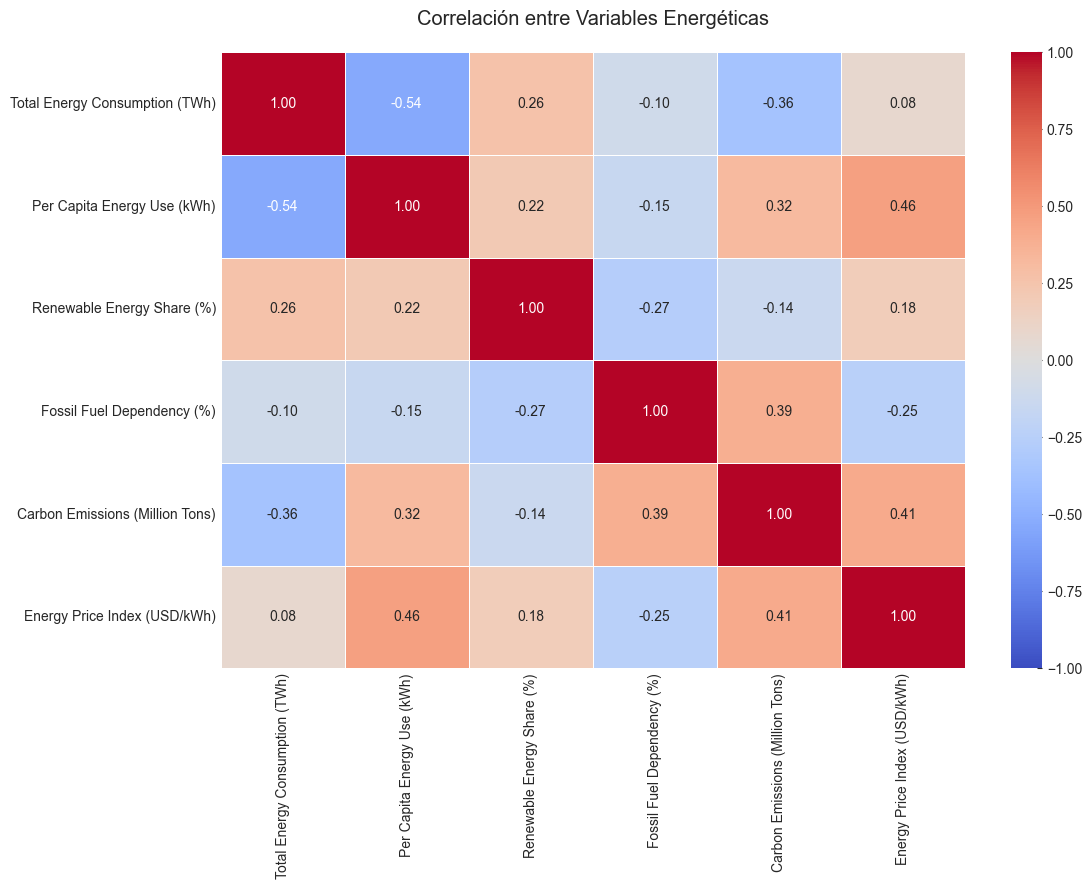

In [37]:
# Cerando un grafico de correlación entre las fuentes tanto renovables como de combustibles fosiles
cols = ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']

viz.crear_grafico_correlacion(df, cols, 'Country', 'Correlación entre Variables Energéticas')

## **Evaluación de la Hipótesis planteada para la sección**

---

#### R/ La hipótesis se sostiene en la mayoria de casos, con tratados como el CETA, T-MEC, RCEP, etc. se evidencia un aumento en el uso de tecnologías de energías verdes, por otro lado estan los tratados O acuerdos como el AUSFTA, Acuerdo Mercosur-UE, etc. no veneficiaron el uso de energías renovables y por ende la divercificación de la matriz energética de estos países tendía al uso del petroleo y sus derivados. 

## **Respuestas a las preguntas de la sección**

#### *¿En qué períodos se aceleró o frenó la adopción de renovables en cada país (p.ej. tras crisis económicas, tras acuerdos climáticos)?*

---

#### R/ 

- Australia:

    - Freno 2004-2006 : El AUSFTA con EE.UU. priorizó exportaciones mineras y agrícolas, desincentivando las renovables (tal como se evidencia en la gráfica con bajones en la cuota de energías renovables).

    - Recuperación post-2010 : Políticas verdes y subsidios reactivaron su uso, aunque con fluctuaciones.

    - 2010-2016 : Desaceleración económica post-boom de materias primas frenó inversiones en renovables, pero el ChAFTA - Acuerdo de libre comercio entre China y Australia (2015) diversificó exportaciones y reactivó proyectos verdes.

    - 2018-2023 : Integración al CPTPP - Acuerdo Integral y Progresivo de Asociación Transpacífico y la crisis energética global (2022) aceleraron la transición hacia renovables, aunque con fluctuaciones por inflación y ajustes post-pandemia.

- Brasil:

    - 2008-2009 : La crisis global afectó de forma moderada el uso de energías renovables, haciendo que se refugie en su fuerte con las hidroeléctricas.

    - 2014-2016: Se presenta una recesión económica frenando inversiones en renovables, aunque su matriz hidroeléctrica amortiguó el impacto, por lo que en la gráfica se evidencia un aumento en energías renovables.

    - 2019-2020: Acuerdo Mercosur-UE (no ratificado) y desaceleración pre-pandemia (2019) limitaron avances, pero la solar/eólica crecieron post-2020.

- Canadá:

    - 2017 : CETA - Acuerdo Económico y Comercial Global entre la Unión Europea y Canadá con la UE, esto se derivó en un mayor acceso a tecnologías limpias, aunque esto no se evidencia de forma inmediata en la gráfica, sino que hasta 2018 fue donde aumentó el uso de energías renovables.

    - 2018 : CPTPP - Acuerdo Integral y Progresivo de Asociación Transpacífico, dicho acuerto favorecio la integración regional verde, dado que se incluyo un capítulo de desarrollo sostenible que obliga a cumplir estándares ambientales elevados, conservar la biodiversidad y reforzar la cooperación contra el cambio climático.

    - 2020-2023 : T-MEC - Tratado entre México, Estados Unidos y Canadá, y pandemia, estos 2 sucesos impactaron en la implementación de energías renovables, aunque tal como se evidencia en la grafica del 2020-2021 decrecio su uso de este tipo de energías, posteriormente aumento en gran medida.

- China:

    - Freno post-2001 : Tras su ingreso a la OMC, aumentó su dependencia de combustibles fósiles para exportar productos masivamente, lo que redujo temporalmente su cuota de renovables.

    - Aceleración desde 2010 : Inversión estatal en renovables (solar y eólica) impulsó un crecimiento sostenido, reflejado en el alza gradual de su línea en la gráfica.

    - 2020 : Liderazgo en el RCEP (acuerdo comercial Asia-Pacífico) y compromiso climático (neutralidad de carbono para 2060) impulsan renovables, aunque la pandemia (2020-2022) generó desafíos en cadenas de suministro.

- Almenia:

    - 2008-2009 : La crisis global provocó recortes temporales, pero gracias a la aplicación de la estrategia llamada Energiewende favorecio a que la tendencia dejara de ser negativa a positiva respecto al uso de energías renovables.

    - 2010-2012 : Crisis de la Eurozona lo que se ve reflejado en la baja del uso de energías renovables de forma estrepitosa.

    - 2022-2023 : Guerra en Ucrania lo que produjo la crisis energética por el gas Ruso, aunque esto veneficio a la aceleración en renovables.

- India:

    - 2008-2009 : Crisis global, aunque esta crisis no afectó la implementación de energías renovables, dado que en la gráfica se ve la tendencia al alza.

    - 2019 : Desaceleración económica pre-pandemia, lo que se traduce en una menor inversión en estas energías por lo que se ve una tendencia a la baja.

    - 2020 : RCEP - Regional Comprehensive Economic Partnership y objetivos climáticos (500 GW renovables para 2030), esto no tuvo inmediato sino que justo para el año 2021-2022 aumentaron su uso de energías renovables.

- Japón:

    - 2008-2009 : Crisis global, lo que para este país no represento una caida de las energías renovables, por el contrario este factor aumento.

    - 2011 : Fukushima, donde despues de este desastre se optó por el abandono nuclear e impulso a renovables.

    - 2018-2019 : CPTPP y EPA con la UE, con estos acuerdos y tratados de cooperación, pero a pesar de esto no se aprecia que mejore el uso de energías renovables.

    - 2020-2023 : Pandemia y alza de precios fósiles, en esta época el comportamiento es algo volátil, por lo que no presenta una tendencia clara.

- Rusia:

    - 2012 : Ingreso a la OMC, en este periodo de tiempo no se presentan mejoras en el uso de energías renovables e incluso se evidencia en la gráfica un aumento en el uso de otro tipo de energías.

    - 2014-2016 : Crisis financiera y sanciones, este evento en vez de disminuir la cuota de energías renovables la aumento, esta tendencia se deba más que todo a la gran oferta de petroleo y gas por parte de la OPEP por lo que sus precios bajaron en gran medida.

    - 2022-2023 : Guerra en Ucrania y sanciones, se presencia un colapso en renovables (dependencia absoluta de hidrocarburos).

- UK:

    - 2008-2009 : Crisis global, aunque este tipo de eventos suelen hacer que un pais se refujie en su recurso energetico más fuerte que para este tiempo es el petroleo, aun así se presenta una pequeña subida en el uso de energías renovables dando a entender que se esta insistiendo en una diversificación de la matriz energética.

    - 2010-2012 : Durante el período de austeridad fiscal post-crisis de la Eurozona, impulsada por la necesidad de consolidar las finanzas públicas, el apoyo a las energías renovables se vio reducido. 

    -  2016 : El referéndum del Brexit marcó la decisión del Reino Unido de separarse de la Unión Europea, un proceso que culminó oficialmente en 2020. Este evento generó una considerable incertidumbre en múltiples campos, incluyendo el energético. La potencial pérdida de financiación europea, la redefinición del marco regulatorio y la perspectiva de una mayor autonomía normativa introdujeron dinámicas contrapuestas. La forma en que el Reino Unido ha usado energías renovables ha cambiado de muchas maneras diferentes. Esto nos dice que el Brexit tuvo efectos buenos y malos a lo largo del tiempo. 

- USA:

    - 2008-2009 : Crisis global, afectando drásticamente a la mayor economía, reflejando en la gráfica un descenso drástico en el uso de energías renovables.

    - 2017 : Retiro del Acuerdo de París, frenando así la inversión a este tipo de energías y aumentando el apoyo del uso del fraking, por lo que en dicho gobierno de turno se priorizó la industria de los combustibles fósiles.

    - 2020 : El T-MEC y la pandemia de COVID-19 representaron eventos de naturaleza opuesta con impactos significativos en el sector energético renovable. A pesar del potencial del acuerdo comercial, la gráfica evidencia que el efecto predominante de la pandemia fue negativo, resultando en una reducción en la proporción de energías renovables utilizadas.

## 6. Conclusiones

## 7. Referencias

- dataset: https://www.kaggle.com/datasets/atharvasoundankar/global-energy-consumption-2000-2024    
- Metodologías aplicadas:
    - **Análisis univariante**: Estudio de distribuciones mediante histogramas y gráficos KDE para identificar distribuciones multimodales y platicúrticas en variables como consumo energético.
    - **Análisis bivariante**: Correlaciones entre pares de variables energéticas, identificando relaciones entre consumo, emisiones y fuentes energéticas.
    - **Series temporales**: Estudio de la evolución temporal de indicadores energéticos utilizando gráficos de líneas por país.
    - **análisis comparativo con boxplots**: Estudio comparativo de la distribución de una misma variable cuantitativa entre diferentes paises.
- 